<a href="https://colab.research.google.com/github/vishal5498/sleepandhealth/blob/main/Sleep%26Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv( '/content/drive/MyDrive/Colab Notebooks/Projects/Sleep_health_and_lifestyle_dataset.csv' )
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
categorical_features=[col for col in df.columns if df[col].dtype =='O']
categorical_features.remove('Blood Pressure')
data_cat=df[categorical_features]
data_cat.head()

,Gender,Occupation,BMI Category,Sleep Disorder
0,Male,Software Engineer,Overweight,None
1,Male,Doctor,Normal,None
2,Male,Doctor,Normal,None
3,Male,Sales Representative,Obese,Sleep Apnea
4,Male,Sales Representative,Obese,Sleep Apnea


In [4]:
#One hot encoding the categorical features and then joining it with the main dataframe
for col in categorical_features:
  col_encoded = pd.get_dummies(data_cat[col],prefix=col,drop_first=True)
  data_cat = pd.concat([data_cat,col_encoded], axis=1)
  data_cat.drop(col,axis=1,inplace=True )

In [5]:
data_cat.head()

,Gender_Male,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_None,Sleep Disorder_Sleep Apnea
0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [6]:
df = pd.concat([df,data_cat], axis=1)
df.drop(columns=categorical_features,axis=1,inplace=True)
df

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Gender_Male,...,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_None,Sleep Disorder_Sleep Apnea
0,1,27,6.1,6,42,6,126/83,77,4200,1,...,0,0,0,1,0,0,0,1,1,0
1,2,28,6.2,6,60,8,125/80,75,10000,1,...,0,0,0,0,0,0,0,0,1,0
2,3,28,6.2,6,60,8,125/80,75,10000,1,...,0,0,0,0,0,0,0,0,1,0
3,4,28,5.9,4,30,8,140/90,85,3000,1,...,1,0,0,0,0,0,1,0,0,1
4,5,28,5.9,4,30,8,140/90,85,3000,1,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,59,8.1,9,75,3,140/95,68,7000,0,...,0,0,0,0,0,0,0,1,0,1
370,371,59,8.0,9,75,3,140/95,68,7000,0,...,0,0,0,0,0,0,0,1,0,1
371,372,59,8.1,9,75,3,140/95,68,7000,0,...,0,0,0,0,0,0,0,1,0,1
372,373,59,8.1,9,75,3,140/95,68,7000,0,...,0,0,0,0,0,0,0,1,0,1


In [7]:
#Next splitting the BP number into components, Systolic and Diastolic BP convert from text to numeric form
df[['BP_Systolic','BP_Diastolic']]=df['Blood Pressure'].str.split( '/',expand=True)
df['BP_Systolic'] = df['BP_Systolic'].astype(int)
df['BP_Diastolic'] = df['BP_Diastolic'].astype(int)

In [8]:
df.drop('Sleep Disorder_None',axis=1,inplace=True)
df.drop('Blood Pressure',axis=1, inplace=True )

<Axes: >

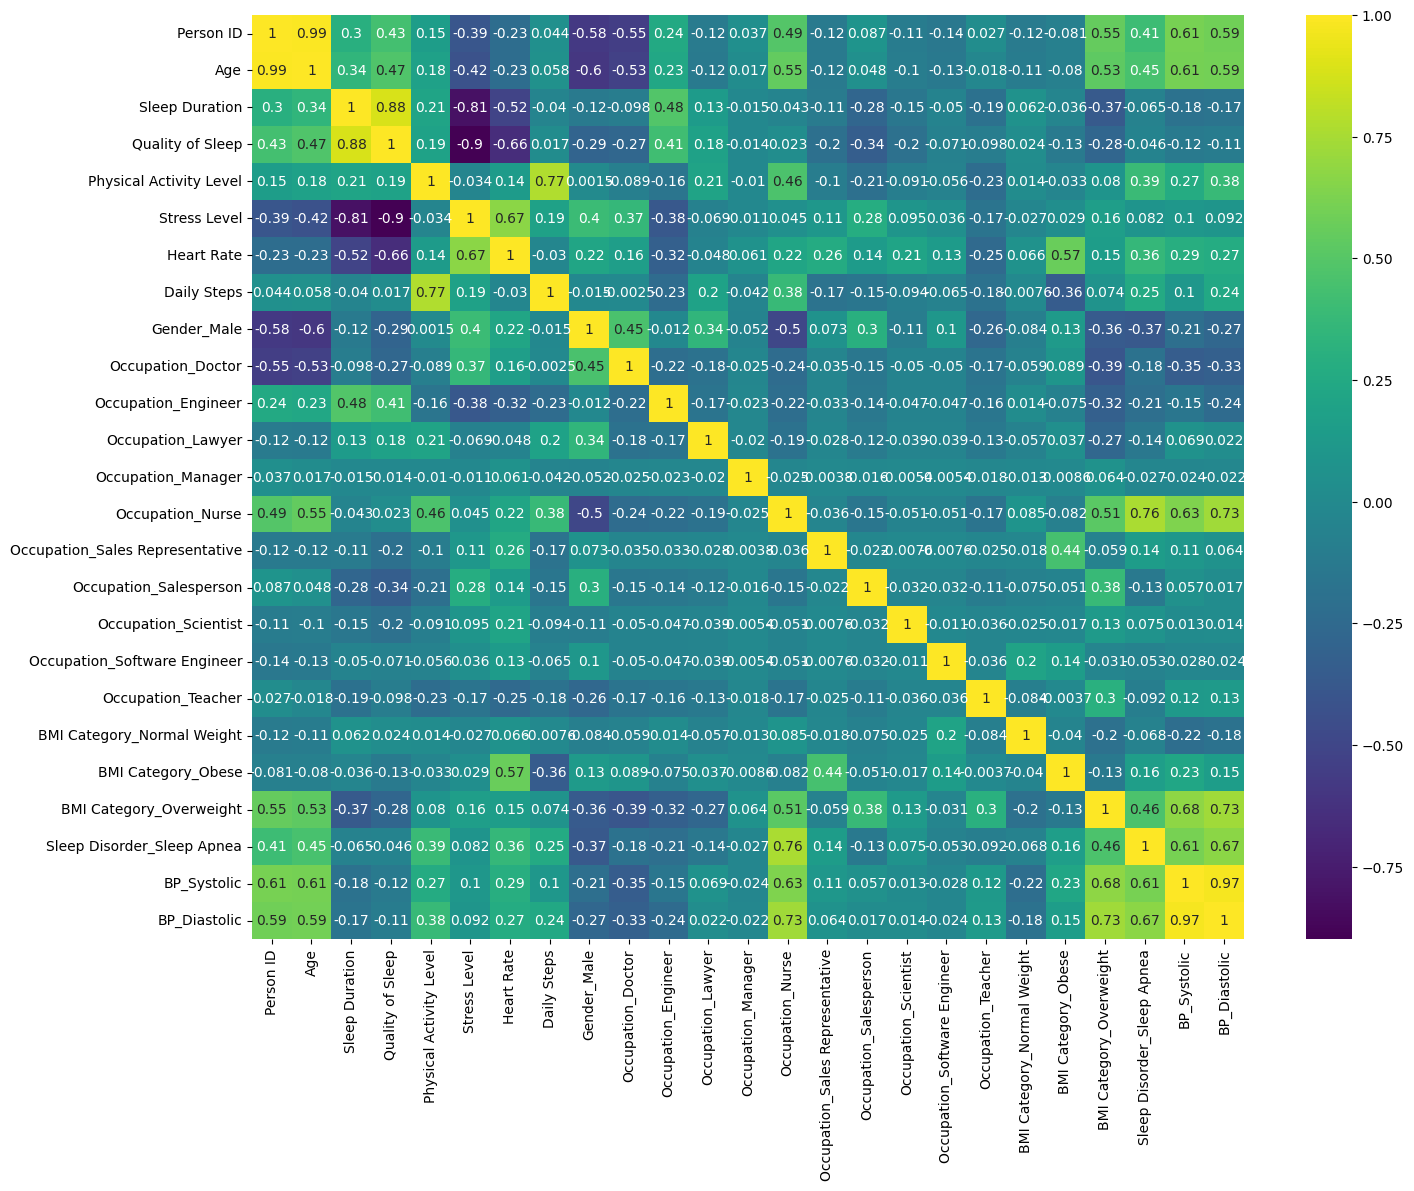

In [9]:
corr = df.corr()
figure = plt.figure(figsize=(16,12))
sns.heatmap(corr,annot=True,cmap='viridis')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X=df.drop('Sleep Disorder_Sleep Apnea',axis=1)
y=df['Sleep Disorder_Sleep Apnea']

#Splitting df into test and train data
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state=42)

In [11]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
#Making predictions on the test data
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0], dtype=uint8)

In [13]:
# Evaluating the accuracy of the model
accuracy = accuracy_score (y_test, y_pred)
print (f"Accuracy: {accuracy*100:.2f}%" )

Accuracy: 92.04%
